In [98]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os

import IPython.display as ipd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ast

from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder,StandardScaler,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import keras
plt.rcParams['figure.figsize'] = (17, 5)

from myfunctions import plot_confusion_matrix

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Getting data ready for modelling

In [4]:
df = pd.read_csv('../data/Final-csvs/features.csv')

In [5]:
df.head()

,track_id,chroma_cqt,chroma_cens,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_contrast,rolloff,zero_crossing_rate,tonnetz,...,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,rmse,genre,testtrainval
0,126014,0.267008,0.171130,0.237383,699.229710,785.999971,25.676751,1183.751175,0.041712,0.092841,...,-13.275584,-12.988043,-15.687397,-12.339302,2.211766,2.147864,-5.011512,0.074824,Instrumental,training
1,54496,0.274600,0.207362,0.277710,1833.074733,2091.124342,25.274995,3818.560243,0.093890,0.044640,...,3.441898,-0.244973,4.090439,-1.278771,9.071951,-0.169724,0.161876,0.030249,Experimental,training
2,65893,0.458305,0.253559,0.412075,2767.487106,2741.112704,20.450162,5889.689386,0.111506,0.013648,...,3.085722,-3.682684,2.957125,-2.243021,1.578797,-4.537785,1.052801,0.206977,Folk,training
3,71158,0.531325,0.258276,0.424391,1444.225428,2060.084462,19.861984,3089.631317,0.046734,0.000029,...,2.822888,-2.630777,1.943587,-7.131413,1.516889,-0.094114,-0.776687,0.241167,Hip-Hop,training
4,57821,0.412456,0.239312,0.335196,2253.305912,2412.719760,22.327731,4858.028957,0.099870,0.024816,...,-2.783748,-6.777088,-3.736772,-11.871335,-0.826213,-2.934075,6.011378,0.270437,Hip-Hop,training


In [6]:
df.shape

(7997, 33)

In [7]:
df.set_index('track_id',inplace=True)

In [8]:
df.head()

,chroma_cqt,chroma_cens,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_contrast,rolloff,zero_crossing_rate,tonnetz,mfcc1,...,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,rmse,genre,testtrainval
track_id,,,,,,,,,,,,,,,,,,,,,
126014,0.267008,0.171130,0.237383,699.229710,785.999971,25.676751,1183.751175,0.041712,0.092841,-352.161438,...,-13.275584,-12.988043,-15.687397,-12.339302,2.211766,2.147864,-5.011512,0.074824,Instrumental,training
54496,0.274600,0.207362,0.277710,1833.074733,2091.124342,25.274995,3818.560243,0.093890,0.044640,-290.169464,...,3.441898,-0.244973,4.090439,-1.278771,9.071951,-0.169724,0.161876,0.030249,Experimental,training
65893,0.458305,0.253559,0.412075,2767.487106,2741.112704,20.450162,5889.689386,0.111506,0.013648,-80.027184,...,3.085722,-3.682684,2.957125,-2.243021,1.578797,-4.537785,1.052801,0.206977,Folk,training
71158,0.531325,0.258276,0.424391,1444.225428,2060.084462,19.861984,3089.631317,0.046734,0.000029,-123.564980,...,2.822888,-2.630777,1.943587,-7.131413,1.516889,-0.094114,-0.776687,0.241167,Hip-Hop,training
57821,0.412456,0.239312,0.335196,2253.305912,2412.719760,22.327731,4858.028957,0.099870,0.024816,-71.340874,...,-2.783748,-6.777088,-3.736772,-11.871335,-0.826213,-2.934075,6.011378,0.270437,Hip-Hop,training


In [9]:
y = df[['genre']]

In [10]:
X = df.drop(['genre','testtrainval'],axis=1)

In [11]:
from sklearn.utils import shuffle


In [12]:
X_train, X_test, y_train , y_test = train_test_split(X,y,stratify=y,test_size=1000)

In [13]:
X_train, X_val, y_train , y_val = train_test_split(X_train,y_train,stratify=y_train,test_size=1000)

In [14]:
X_train.shape, X_test.shape,X_val.shape

((5997, 30), (1000, 30), (1000, 30))

In [15]:
y_val

,genre
track_id,
11544,Experimental
73342,Electronic
7548,Experimental
71247,Hip-Hop
73768,International
...,...
98301,International
38887,Experimental
129088,Rock


In [16]:
lb = LabelBinarizer()

In [17]:
y_train_lb =lb.fit_transform(y_train)
y_val_lb = lb.transform(y_val)
y_test_lb = lb.transform(y_test)

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [20]:
from keras import models
from keras import models
from keras import layers
from keras import optimizers
optimizer = keras.optimizers.SGD(decay=0.001, momentum=0.99)


# First Basic Model - Overfitting

In [21]:
base_model = models.Sequential(name='base')

base_model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

base_model.add(layers.Dense(128, activation='relu'))

base_model.add(layers.Dense(64, activation='relu'))

base_model.add(layers.Dense(8, activation='softmax'))

base_model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_base = base_model.fit(X_train,
                    y_train_lb,
                    epochs=75,validation_data=(X_val,y_val_lb),shuffle=False)

Train on 5997 samples, validate on 1000 samples
Epoch 1/75
5997/5997 [==============================] - 1s 163us/step - loss: 1.6552 - acc: 0.3952 - val_loss: 1.6139 - val_acc: 0.4070
Epoch 2/75
5997/5997 [==============================] - 1s 97us/step - loss: 1.4759 - acc: 0.4726 - val_loss: 1.5593 - val_acc: 0.4360
Epoch 3/75
5997/5997 [==============================] - 1s 97us/step - loss: 1.3853 - acc: 0.5178 - val_loss: 1.5208 - val_acc: 0.4480
Epoch 4/75
5997/5997 [==============================] - 1s 95us/step - loss: 1.3064 - acc: 0.5433 - val_loss: 1.5067 - val_acc: 0.4650
Epoch 5/75
5997/5997 [==============================] - 1s 98us/step - loss: 1.2322 - acc: 0.5661 - val_loss: 1.5224 - val_acc: 0.4610
Epoch 6/75
5997/5997 [==============================] - 1s 95us/step - loss: 1.1618 - acc: 0.5883 - val_loss: 1.5337 - val_acc: 0.4600
Epoch 7/75
5997/5997 [==============================] - 1s 103us/step - loss: 1.0903 - acc: 0.6131 - val_loss: 1.5853 - val_acc: 0.4600
Epoch

Epoch 61/75
5997/5997 [==============================] - 1s 99us/step - loss: 0.1339 - acc: 0.9575 - val_loss: 5.2017 - val_acc: 0.4510
Epoch 62/75
5997/5997 [==============================] - 1s 101us/step - loss: 0.1766 - acc: 0.9508 - val_loss: 5.0112 - val_acc: 0.4660
Epoch 63/75
5997/5997 [==============================] - 1s 100us/step - loss: 0.1732 - acc: 0.9463 - val_loss: 4.9519 - val_acc: 0.4450
Epoch 64/75
5997/5997 [==============================] - 1s 102us/step - loss: 0.1188 - acc: 0.9615 - val_loss: 4.8168 - val_acc: 0.4730
Epoch 65/75
5997/5997 [==============================] - 1s 95us/step - loss: 0.0794 - acc: 0.9760 - val_loss: 4.8868 - val_acc: 0.4820
Epoch 66/75
5997/5997 [==============================] - 1s 112us/step - loss: 0.0624 - acc: 0.9782 - val_loss: 4.6686 - val_acc: 0.4910
Epoch 67/75
5997/5997 [==============================] - 1s 111us/step - loss: 0.0450 - acc: 0.9845 - val_loss: 5.0140 - val_acc: 0.4650
Epoch 68/75
5997/5997 [====================

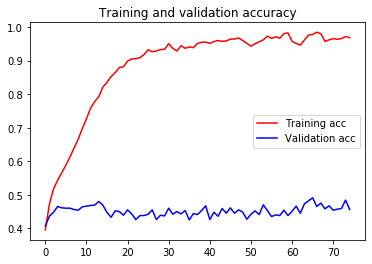

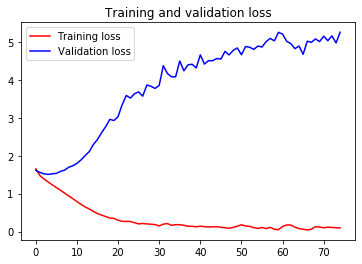

5997/5997 [==============================] - 0s 47us/step
----------
Training Loss: 0.141 
Training Accuracy: 0.959
1000/1000 [==============================] - 0s 36us/step
----------
Training Loss: 5.56 
Training Accuracy: 0.435


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_base.history['acc']
val_acc = history_base.history['val_acc']
loss = history_base.history['loss']
val_loss = history_base.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', c='r',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

base_model.save('../savedmodels/neuralnetworks/basemodel.h5')

base_results_train = base_model.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {base_results_train[0]:.3} \nTraining Accuracy: {base_results_train[1]:.3}')

base_results_test = base_model.evaluate(X_test, y_test_lb)
print('----------')
print(f'Training Loss: {base_results_test[0]:.3} \nTraining Accuracy: {base_results_test[1]:.3}')

Accuracy: 0.958813
Precision: 0.959850
Recall: 0.958804
F1 score: 0.958844


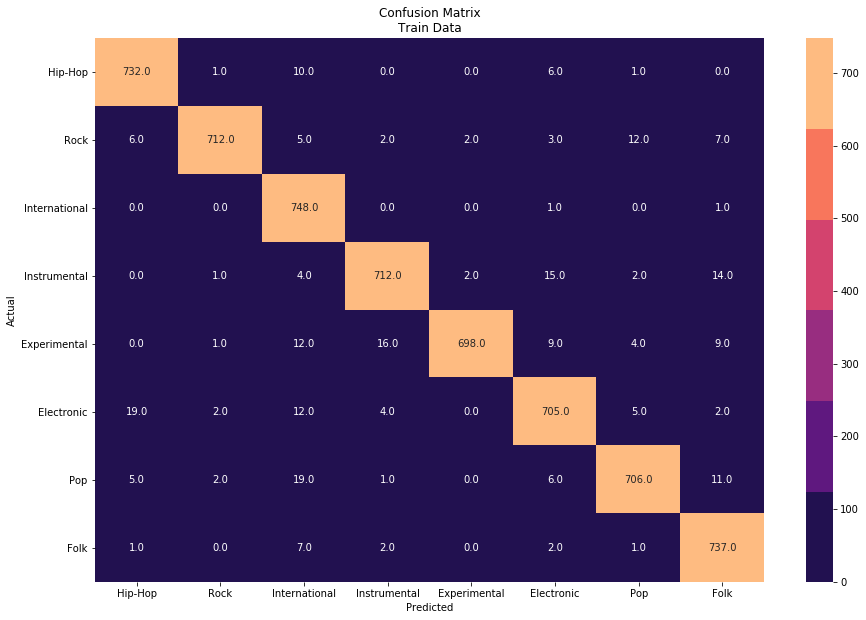

In [23]:
plot_confusion_matrix(y_train,lb.inverse_transform(base_model.predict(X_train)),'Train')

Accuracy: 0.435000
Precision: 0.439519
Recall: 0.435000
F1 score: 0.434889


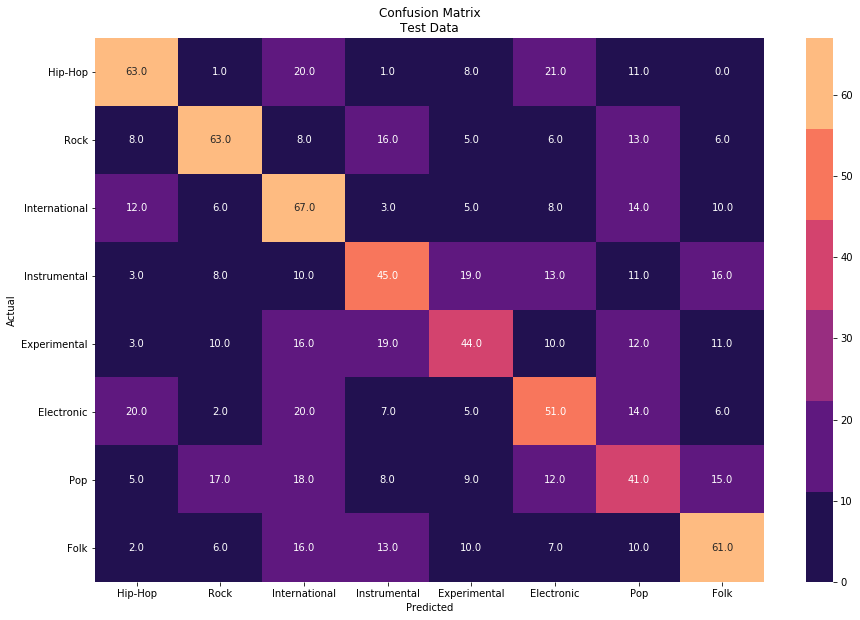

In [24]:
plot_confusion_matrix(y_test,lb.inverse_transform(base_model.predict(X_test)),'Test')

# Second Basic Model - Different Optimizer

In [25]:
base_model2 = models.Sequential(name='base2')

base_model2.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

base_model2.add(layers.Dense(128, activation='relu'))
base_model2.add(layers.Dense(64, activation='relu'))

base_model2.add(layers.Dense(8, activation='softmax'))

base_model2.compile(optimizer='RMSProp',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_base2 = base_model2.fit(X_train,
                    y_train_lb,
                    epochs=75,validation_data=(X_val,y_val_lb),shuffle=False)

Train on 5997 samples, validate on 1000 samples
Epoch 1/75
5997/5997 [==============================] - 1s 170us/step - loss: 1.6602 - acc: 0.3889 - val_loss: 1.5985 - val_acc: 0.4200
Epoch 2/75
5997/5997 [==============================] - 1s 85us/step - loss: 1.4960 - acc: 0.4607 - val_loss: 1.5519 - val_acc: 0.4290
Epoch 3/75
5997/5997 [==============================] - 1s 89us/step - loss: 1.4187 - acc: 0.4909 - val_loss: 1.5398 - val_acc: 0.4380
Epoch 4/75
5997/5997 [==============================] - 1s 91us/step - loss: 1.3585 - acc: 0.5161 - val_loss: 1.5315 - val_acc: 0.4370
Epoch 5/75
5997/5997 [==============================] - 0s 83us/step - loss: 1.3025 - acc: 0.5386 - val_loss: 1.5361 - val_acc: 0.4440
Epoch 6/75
5997/5997 [==============================] - 1s 89us/step - loss: 1.2543 - acc: 0.5569 - val_loss: 1.5414 - val_acc: 0.4500
Epoch 7/75
5997/5997 [==============================] - 1s 86us/step - loss: 1.2057 - acc: 0.5736 - val_loss: 1.5529 - val_acc: 0.4440
Epoch 

Epoch 61/75
5997/5997 [==============================] - 1s 92us/step - loss: 0.1099 - acc: 0.9620 - val_loss: 4.9379 - val_acc: 0.4330
Epoch 62/75
5997/5997 [==============================] - 1s 93us/step - loss: 0.1025 - acc: 0.9678 - val_loss: 4.8215 - val_acc: 0.4480
Epoch 63/75
5997/5997 [==============================] - 1s 91us/step - loss: 0.1166 - acc: 0.9638 - val_loss: 5.1610 - val_acc: 0.4280
Epoch 64/75
5997/5997 [==============================] - 1s 96us/step - loss: 0.1005 - acc: 0.9672 - val_loss: 4.9666 - val_acc: 0.4490
Epoch 65/75
5997/5997 [==============================] - 1s 88us/step - loss: 0.1084 - acc: 0.9675 - val_loss: 4.9544 - val_acc: 0.4540
Epoch 66/75
5997/5997 [==============================] - 1s 95us/step - loss: 0.1069 - acc: 0.9630 - val_loss: 5.0577 - val_acc: 0.4410
Epoch 67/75
5997/5997 [==============================] - 1s 89us/step - loss: 0.0954 - acc: 0.9702 - val_loss: 4.9839 - val_acc: 0.4530
Epoch 68/75
5997/5997 [=========================

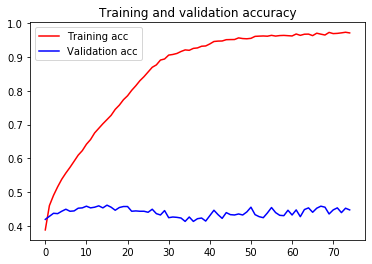

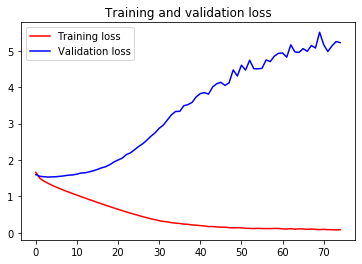

5997/5997 [==============================] - 0s 50us/step
----------
Training Loss: 0.208 
Training Accuracy: 0.938
1000/1000 [==============================] - 0s 65us/step
----------
Training Loss: 5.76 
Training Accuracy: 0.417


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_base2.history['acc']
val_acc = history_base2.history['val_acc']
loss = history_base2.history['loss']
val_loss = history_base2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', c='r',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

base_model2.save('../savedmodels/neuralnetworks/basemodel2.h5')

base_results_train = base_model2.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {base_results_train[0]:.3} \nTraining Accuracy: {base_results_train[1]:.3}')

base_results_test = base_model2.evaluate(X_test, y_test_lb)
print('----------')
print(f'Training Loss: {base_results_test[0]:.3} \nTraining Accuracy: {base_results_test[1]:.3}')

Accuracy: 0.938302
Precision: 0.941316
Recall: 0.938285
F1 score: 0.938234


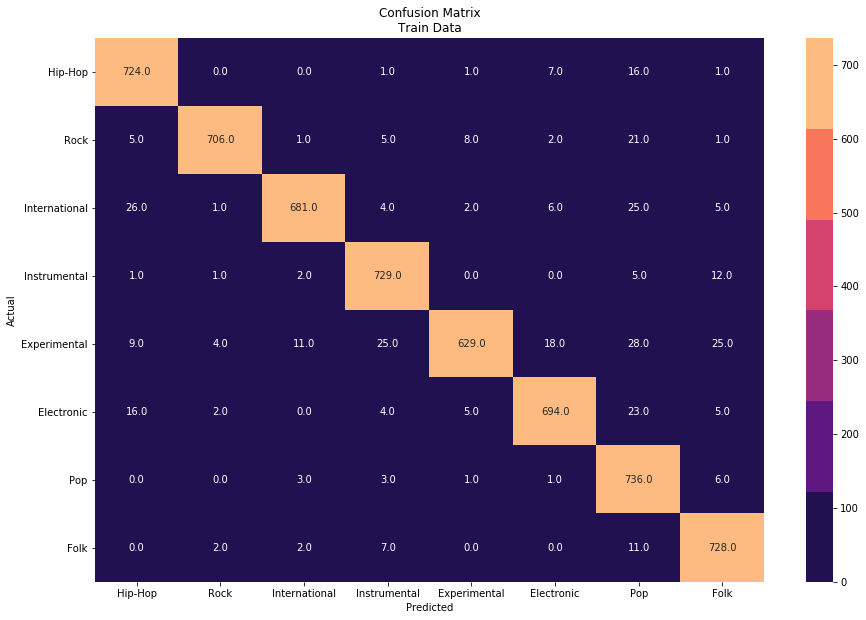

In [27]:
plot_confusion_matrix(y_train,lb.inverse_transform(base_model2.predict(X_train)),'Train')

Accuracy: 0.417000
Precision: 0.426512
Recall: 0.417000
F1 score: 0.418820


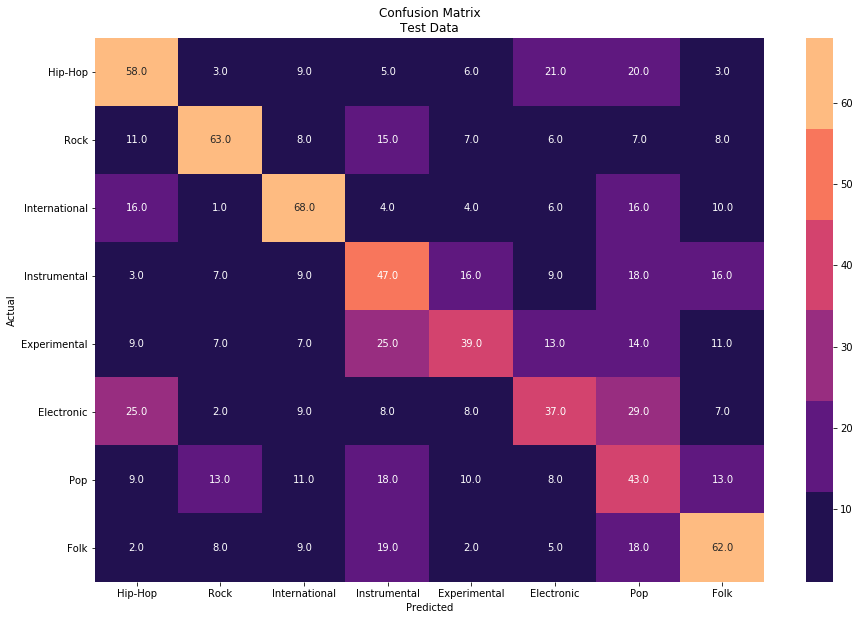

In [28]:
plot_confusion_matrix(y_test,lb.inverse_transform(base_model2.predict(X_test)),'Test')

# Adding Dropouts

In [29]:
drop_model = models.Sequential(name='dropouts')

drop_model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
drop_model.add(layers.Dropout(0.4))
drop_model.add(layers.Dense(128, activation='relu'))
drop_model.add(layers.Dropout(0.4))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.4))
drop_model.add(layers.Dense(8, activation='softmax'))

drop_model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_drop = drop_model.fit(X_train,
                    y_train_lb,
                    epochs=75,validation_data=(X_val,y_val_lb),shuffle=False)

Train on 5997 samples, validate on 1000 samples
Epoch 1/75
5997/5997 [==============================] - 2s 271us/step - loss: 1.8536 - acc: 0.2968 - val_loss: 1.6557 - val_acc: 0.3820
Epoch 2/75
5997/5997 [==============================] - 1s 119us/step - loss: 1.7111 - acc: 0.3764 - val_loss: 1.6231 - val_acc: 0.4140
Epoch 3/75
5997/5997 [==============================] - 1s 119us/step - loss: 1.6713 - acc: 0.3992 - val_loss: 1.5967 - val_acc: 0.4280
Epoch 4/75
5997/5997 [==============================] - 1s 116us/step - loss: 1.6345 - acc: 0.4102 - val_loss: 1.5777 - val_acc: 0.4300
Epoch 5/75
5997/5997 [==============================] - 1s 126us/step - loss: 1.6071 - acc: 0.4154 - val_loss: 1.5528 - val_acc: 0.4320
Epoch 6/75
5997/5997 [==============================] - 1s 132us/step - loss: 1.5864 - acc: 0.4215 - val_loss: 1.5460 - val_acc: 0.4340
Epoch 7/75
5997/5997 [==============================] - 1s 127us/step - loss: 1.5600 - acc: 0.4442 - val_loss: 1.5251 - val_acc: 0.4450


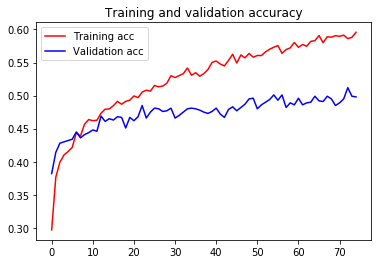

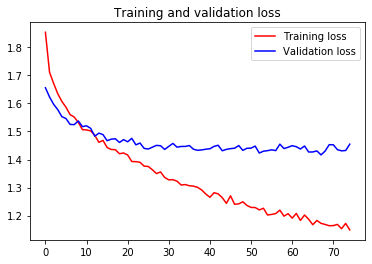

5997/5997 [==============================] - 0s 46us/step
----------
Training Loss: 0.855 
Training Accuracy: 0.721
1000/1000 [==============================] - 0s 38us/step
----------
Training Loss: 1.5 
Training Accuracy: 0.492


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_drop.history['acc']
val_acc = history_drop.history['val_acc']
loss = history_drop.history['loss']
val_loss = history_drop.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,  'b', c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

drop_model.save('../savedmodels/neuralnetworks/dropmodel.h5')


drop_results_train = drop_model.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {drop_results_train[0]:.3} \nTraining Accuracy: {drop_results_train[1]:.3}')

drop_results_test = drop_model.evaluate(X_test, y_test_lb)
print('----------')
print(f'Training Loss: {drop_results_test[0]:.3} \nTraining Accuracy: {drop_results_test[1]:.3}')

Accuracy: 0.492000
Precision: 0.507624
Recall: 0.492000
F1 score: 0.494464


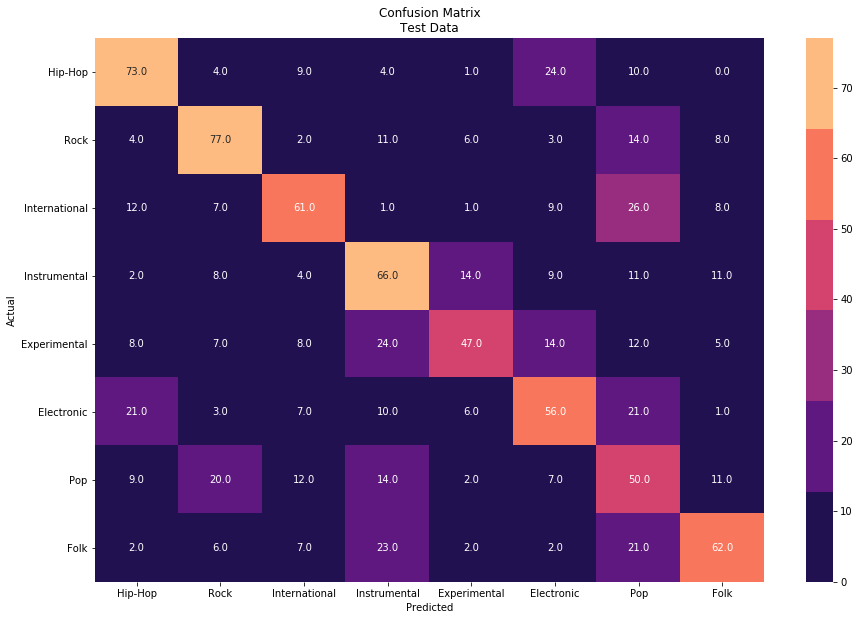

In [31]:
plot_confusion_matrix(y_test,lb.inverse_transform(drop_model.predict(X_test)),'Test')

Accuracy: 0.721361
Precision: 0.734655
Recall: 0.721336
F1 score: 0.720518


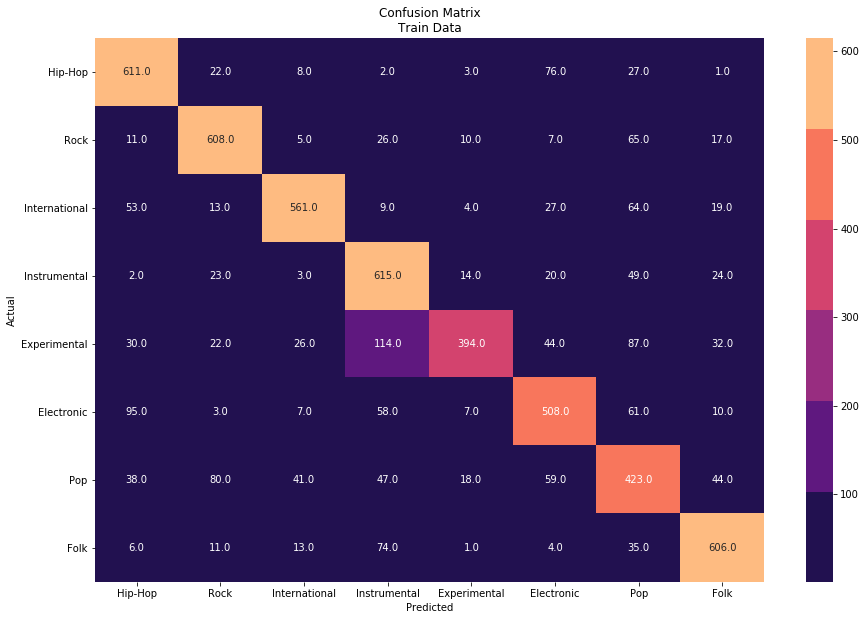

In [32]:
plot_confusion_matrix(y_train,lb.inverse_transform(drop_model.predict(X_train)),'Train')

# Drop 2

In [33]:
drop_model2 = models.Sequential(name='drop2')

drop_model2.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
drop_model2.add(layers.Dropout(0.5))
drop_model2.add(layers.Dense(128, activation='relu'))
drop_model2.add(layers.Dropout(0.2))
drop_model2.add(layers.Dense(64, activation='relu'))
drop_model2.add(layers.Dropout(0.4))
drop_model2.add(layers.Dense(8, activation='softmax'))

drop_model2.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_drop2 = drop_model2.fit(X_train,
                    y_train_lb,epochs=75,validation_data=(X_val,y_val_lb),shuffle=False)

Train on 5997 samples, validate on 1000 samples
Epoch 1/75
5997/5997 [==============================] - 2s 255us/step - loss: 1.8370 - acc: 0.3082 - val_loss: 1.6586 - val_acc: 0.4020
Epoch 2/75
5997/5997 [==============================] - 1s 115us/step - loss: 1.7224 - acc: 0.3749 - val_loss: 1.6074 - val_acc: 0.4100
Epoch 3/75
5997/5997 [==============================] - 1s 120us/step - loss: 1.6647 - acc: 0.4020 - val_loss: 1.5835 - val_acc: 0.4160
Epoch 4/75
5997/5997 [==============================] - 1s 121us/step - loss: 1.6311 - acc: 0.4130 - val_loss: 1.5562 - val_acc: 0.4300
Epoch 5/75
5997/5997 [==============================] - 1s 121us/step - loss: 1.5935 - acc: 0.4322 - val_loss: 1.5571 - val_acc: 0.4380
Epoch 6/75
5997/5997 [==============================] - 1s 118us/step - loss: 1.5875 - acc: 0.4409 - val_loss: 1.5330 - val_acc: 0.4430
Epoch 7/75
5997/5997 [==============================] - 1s 125us/step - loss: 1.5512 - acc: 0.4369 - val_loss: 1.5311 - val_acc: 0.4410


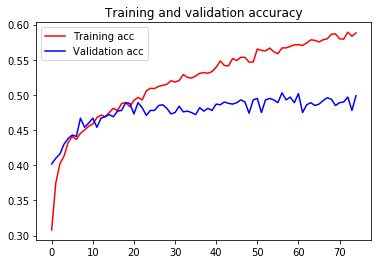

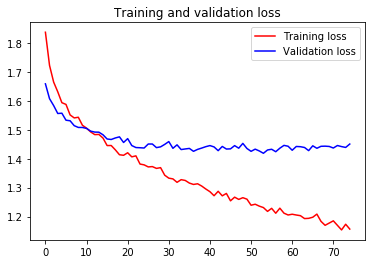

5997/5997 [==============================] - 0s 50us/step
----------
Training Loss: 0.834 
Training Accuracy: 0.715
1000/1000 [==============================] - 0s 40us/step
----------
Training Loss: 1.5 
Training Accuracy: 0.488


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_drop2.history['acc']
val_acc = history_drop2.history['val_acc']
loss = history_drop2.history['loss']
val_loss = history_drop2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,  'b', c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


drop_model2.save('../savedmodels/neuralnetworks/dropmodel2.h5')


drop_results_train = drop_model2.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {drop_results_train[0]:.3} \nTraining Accuracy: {drop_results_train[1]:.3}')

drop_results_test = drop_model2.evaluate(X_test, y_test_lb)
print('----------')
print(f'Training Loss: {drop_results_test[0]:.3} \nTraining Accuracy: {drop_results_test[1]:.3}')

Accuracy: 0.714857
Precision: 0.724842
Recall: 0.714819
F1 score: 0.710862


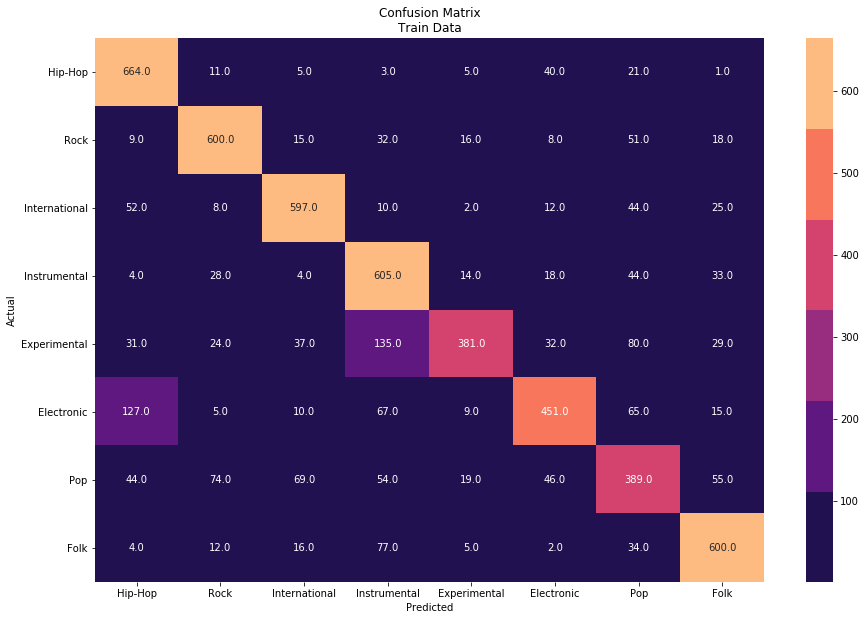

In [35]:
plot_confusion_matrix(y_train,lb.inverse_transform(drop_model2.predict(X_train)),'Train')

Accuracy: 0.488000
Precision: 0.496901
Recall: 0.488000
F1 score: 0.486168


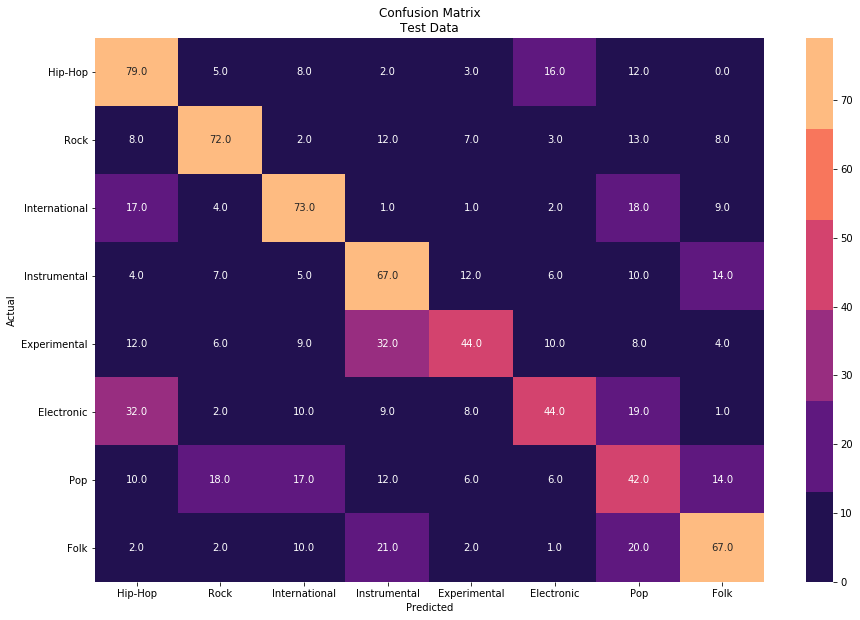

In [36]:
plot_confusion_matrix(y_test,lb.inverse_transform(drop_model2.predict(X_test)),'Test')

# Drop 3

In [37]:
drop_model3 = models.Sequential(name='drop3')
drop_model3.add(layers.Dropout(0.3,input_shape=(X_train.shape[1],)))
drop_model3.add(layers.Dense(256, activation='relu'))
drop_model3.add(layers.Dropout(0.3))
drop_model3.add(layers.Dense(128, activation='relu'))
drop_model3.add(layers.Dense(64, activation='relu'))
drop_model3.add(layers.Dropout(0.5))
drop_model3.add(layers.Dense(8, activation='softmax'))

drop_model3.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_drop3 = drop_model3.fit(X_train,
                    y_train_lb,
                    epochs=75,validation_data=(X_val,y_val_lb),shuffle=False)

Train on 5997 samples, validate on 1000 samples
Epoch 1/75
5997/5997 [==============================] - 2s 305us/step - loss: 1.8868 - acc: 0.2773 - val_loss: 1.6955 - val_acc: 0.3780
Epoch 2/75
5997/5997 [==============================] - 1s 113us/step - loss: 1.7597 - acc: 0.3490 - val_loss: 1.6369 - val_acc: 0.4070
Epoch 3/75
5997/5997 [==============================] - 1s 123us/step - loss: 1.7439 - acc: 0.3628 - val_loss: 1.6326 - val_acc: 0.3970
Epoch 4/75
5997/5997 [==============================] - 1s 114us/step - loss: 1.7276 - acc: 0.3692 - val_loss: 1.6291 - val_acc: 0.4040
Epoch 5/75
5997/5997 [==============================] - 1s 117us/step - loss: 1.7169 - acc: 0.3710 - val_loss: 1.6077 - val_acc: 0.4090
Epoch 6/75
5997/5997 [==============================] - 1s 130us/step - loss: 1.6985 - acc: 0.3769 - val_loss: 1.5878 - val_acc: 0.4190
Epoch 7/75
5997/5997 [==============================] - 1s 121us/step - loss: 1.6803 - acc: 0.3880 - val_loss: 1.5855 - val_acc: 0.4190


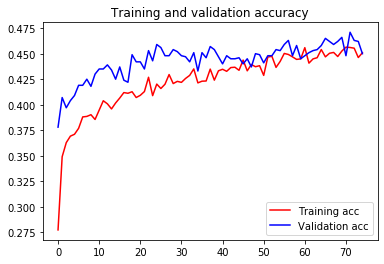

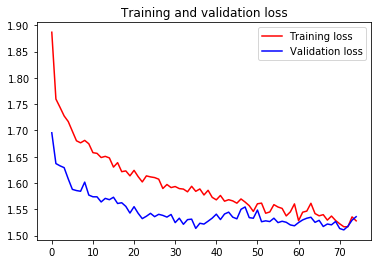

5997/5997 [==============================] - 0s 23us/step
----------
Training Loss: 1.3 
Training Accuracy: 0.525
1000/1000 [==============================] - 0s 24us/step
----------
Training Loss: 1.57 
Training Accuracy: 0.434


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_drop3.history['acc']
val_acc = history_drop3.history['val_acc']
loss = history_drop3.history['loss']
val_loss = history_drop3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,  'b', c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


drop_model3.save('../savedmodels/neuralnetworks/dropmodel3.h5')


drop_results_train = drop_model3.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {drop_results_train[0]:.3} \nTraining Accuracy: {drop_results_train[1]:.3}')

drop_results_test = drop_model3.evaluate(X_test, y_test_lb)
print('----------')
print(f'Training Loss: {drop_results_test[0]:.3} \nTraining Accuracy: {drop_results_test[1]:.3}')


Accuracy: 0.524596
Precision: 0.571210
Recall: 0.524522
F1 score: 0.498609


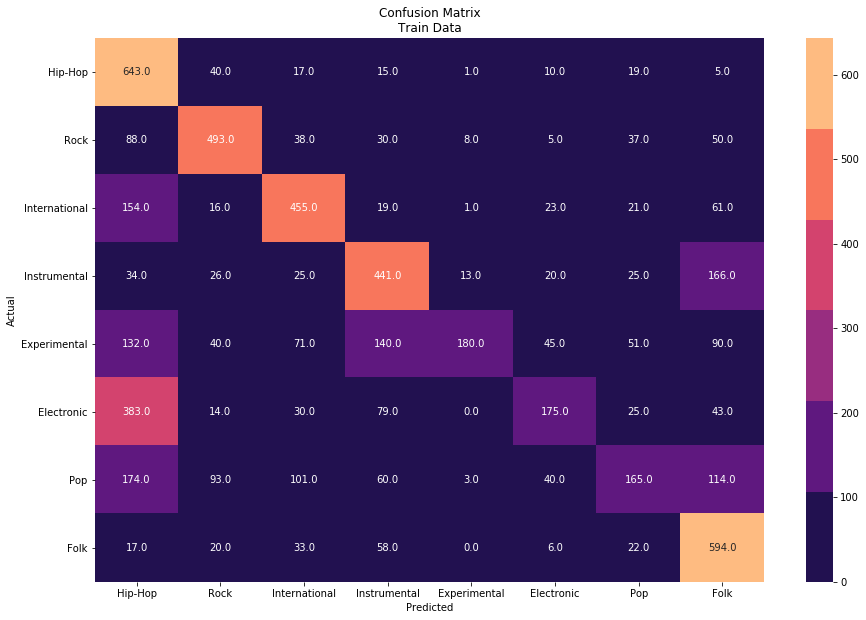

In [39]:
plot_confusion_matrix(y_train,lb.inverse_transform(drop_model3.predict(X_train)),'Train')

Accuracy: 0.434000
Precision: 0.448099
Recall: 0.434000
F1 score: 0.405014


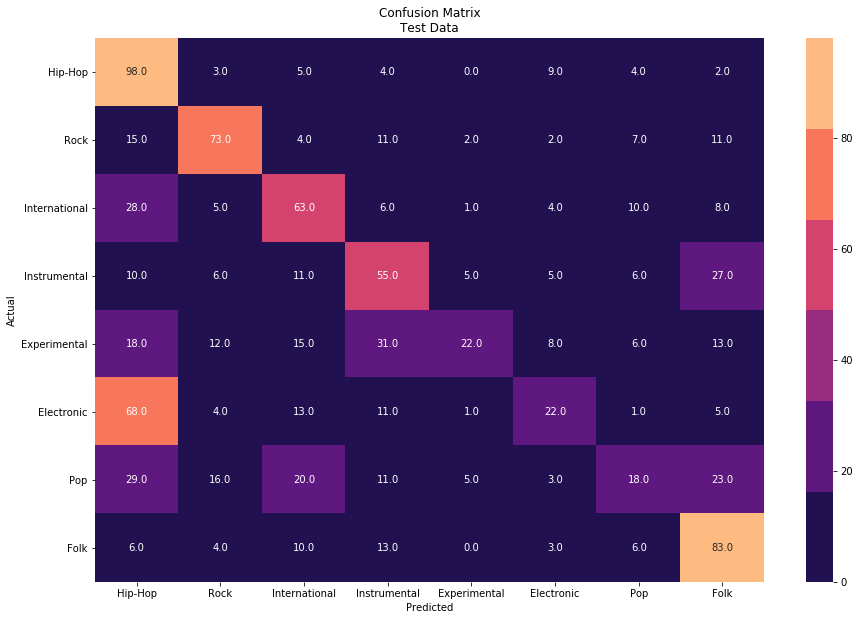

In [40]:
plot_confusion_matrix(y_test,lb.inverse_transform(drop_model3.predict(X_test)),'Test')

# Drop 4

In [41]:
drop_model4 = models.Sequential(name='drop4')
drop_model4.add(layers.Dense(256, activation='relu',kernel_initializer='he_normal', input_shape=(X_train.shape[1],)))
drop_model4.add(layers.Dropout(0.2))
drop_model4.add(layers.Dense(128, activation='relu'))
drop_model4.add(layers.Dense(64, activation='relu'))
drop_model4.add(layers.Dropout(0.4))

drop_model4.add(layers.Dense(8, activation='softmax'))

drop_model4.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_drop4 = drop_model4.fit(X_train,
                    y_train_lb,
                             
                    epochs=75,validation_data=(X_val,y_val_lb),shuffle=False)

Train on 5997 samples, validate on 1000 samples
Epoch 1/75
5997/5997 [==============================] - 2s 296us/step - loss: 1.8376 - acc: 0.3217 - val_loss: 1.6630 - val_acc: 0.3780
Epoch 2/75
5997/5997 [==============================] - 1s 120us/step - loss: 1.6692 - acc: 0.3894 - val_loss: 1.5868 - val_acc: 0.4180
Epoch 3/75
5997/5997 [==============================] - 1s 116us/step - loss: 1.6005 - acc: 0.4244 - val_loss: 1.5859 - val_acc: 0.4180
Epoch 4/75
5997/5997 [==============================] - 1s 117us/step - loss: 1.5503 - acc: 0.4404 - val_loss: 1.5557 - val_acc: 0.4350
Epoch 5/75
5997/5997 [==============================] - 1s 116us/step - loss: 1.5149 - acc: 0.4557 - val_loss: 1.5366 - val_acc: 0.4430
Epoch 6/75
5997/5997 [==============================] - 1s 119us/step - loss: 1.4823 - acc: 0.4621 - val_loss: 1.5383 - val_acc: 0.4340
Epoch 7/75
5997/5997 [==============================] - 1s 118us/step - loss: 1.4551 - acc: 0.4722 - val_loss: 1.5247 - val_acc: 0.4510


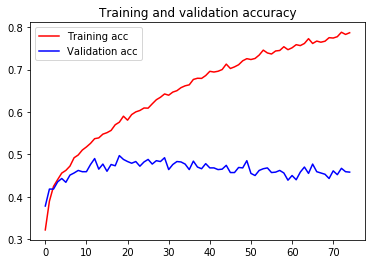

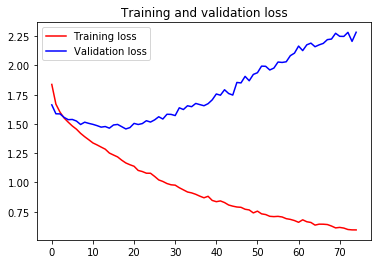

5997/5997 [==============================] - 0s 42us/step
----------
Training Loss: 0.256 
Training Accuracy: 0.919
1000/1000 [==============================] - 0s 40us/step
----------
Training Loss: 2.39 
Training Accuracy: 0.483


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_drop4.history['acc']
val_acc = history_drop4.history['val_acc']
loss = history_drop4.history['loss']
val_loss = history_drop4.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,  'b', c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

drop_model4.save('../savedmodels/neuralnetworks/dropmodel4.h5')


drop_results_train = drop_model4.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {drop_results_train[0]:.3} \nTraining Accuracy: {drop_results_train[1]:.3}')

drop_results_test = drop_model4.evaluate(X_test, y_test_lb)
print('----------')
print(f'Training Loss: {drop_results_test[0]:.3} \nTraining Accuracy: {drop_results_test[1]:.3}')

Accuracy: 0.483000
Precision: 0.493360
Recall: 0.483000
F1 score: 0.485874


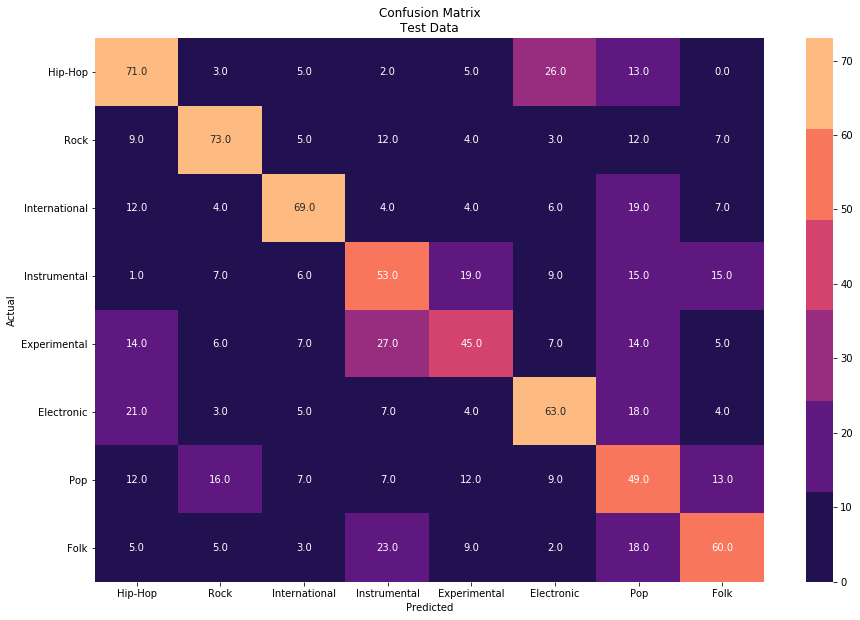

In [43]:
plot_confusion_matrix(y_test,lb.inverse_transform(drop_model4.predict(X_test)),'Test')

Accuracy: 0.918959
Precision: 0.921683
Recall: 0.918946
F1 score: 0.919053


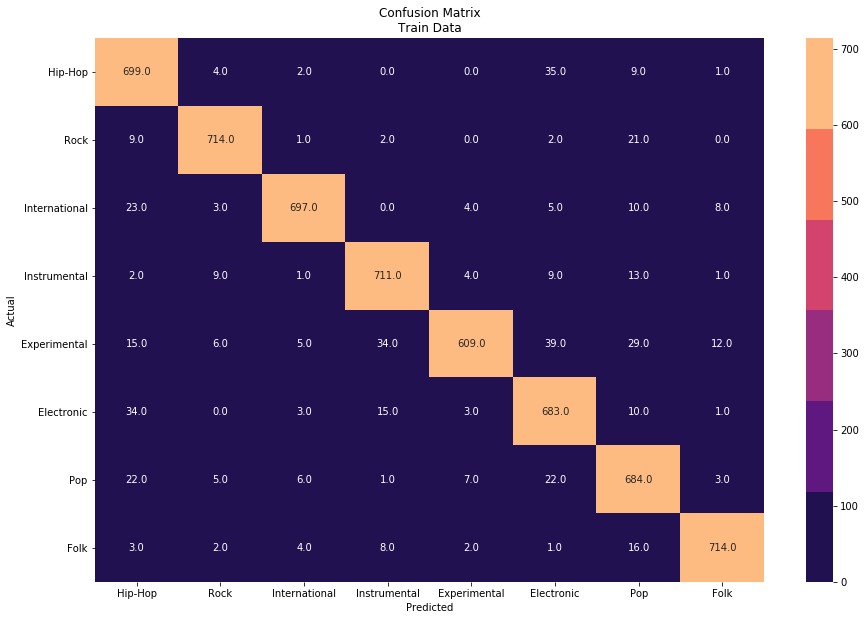

In [44]:
plot_confusion_matrix(y_train,lb.inverse_transform(drop_model4.predict(X_train)),'Train')

# Drop and Regularizations

In [45]:
from keras import regularizers

In [46]:
dropreg_model = models.Sequential(name='dropreg')

dropreg_model.add(layers.Dense(256, activation='relu', kernel_initializer='lecun_normal',kernel_regularizer=regularizers.l2(0.005),input_shape=(X_train.shape[1],)))
dropreg_model.add(layers.Dropout(0.2))
dropreg_model.add(layers.Dense(128, activation='relu', kernel_initializer='lecun_normal',kernel_regularizer=regularizers.l2(0.005)))
dropreg_model.add(layers.Dropout(0.2))
dropreg_model.add(layers.Dense(64, activation='relu', kernel_initializer='lecun_normal',kernel_regularizer=regularizers.l2(0.005)))
dropreg_model.add(layers.Dropout(0.4))
dropreg_model.add(layers.Dense(8, activation='softmax'))

dropreg_model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [47]:
history_dropreg = dropreg_model.fit(X_train,
                    y_train_lb,
                    epochs=50,validation_data=(X_val,y_val_lb),shuffle=False)

Train on 5997 samples, validate on 1000 samples
Epoch 1/50
5997/5997 [==============================] - 2s 327us/step - loss: 3.1878 - acc: 0.3243 - val_loss: 2.3826 - val_acc: 0.4080
Epoch 2/50
5997/5997 [==============================] - 1s 124us/step - loss: 2.1468 - acc: 0.3900 - val_loss: 1.9277 - val_acc: 0.4200
Epoch 3/50
5997/5997 [==============================] - 1s 125us/step - loss: 1.8727 - acc: 0.4179 - val_loss: 1.7863 - val_acc: 0.4310
Epoch 4/50
5997/5997 [==============================] - 1s 130us/step - loss: 1.7878 - acc: 0.4184 - val_loss: 1.7583 - val_acc: 0.4290
Epoch 5/50
5997/5997 [==============================] - 1s 129us/step - loss: 1.7620 - acc: 0.4212 - val_loss: 1.7394 - val_acc: 0.4290
Epoch 6/50
5997/5997 [==============================] - 1s 125us/step - loss: 1.7440 - acc: 0.4250 - val_loss: 1.7241 - val_acc: 0.4330
Epoch 7/50
5997/5997 [==============================] - 1s 127us/step - loss: 1.7344 - acc: 0.4302 - val_loss: 1.7137 - val_acc: 0.4340


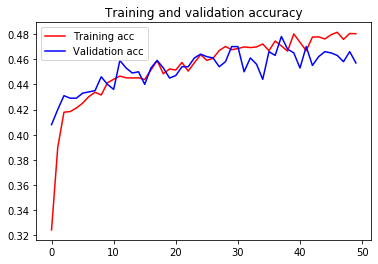

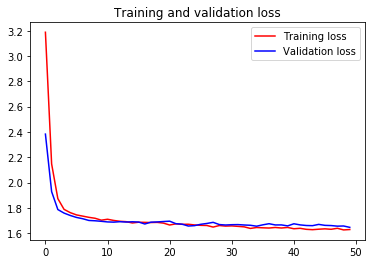

5997/5997 [==============================] - 0s 43us/step
----------
Training Loss: 1.52 
Training Accuracy: 0.518
1000/1000 [==============================] - 0s 44us/step
----------
Testing Loss: 1.67 
Testing Accuracy: 0.454


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_dropreg.history['acc']
val_acc = history_dropreg.history['val_acc']
loss = history_dropreg.history['loss']
val_loss = history_dropreg.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,  'b', c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


drop_model4.save('../savedmodels/neuralnetworks/dropmodel4.h5')


drop_results_train = dropreg_model.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {drop_results_train[0]:.3} \nTraining Accuracy: {drop_results_train[1]:.3}')

drop_results_test = dropreg_model.evaluate(X_test, y_test_lb)
print('----------')
print(f'Testing Loss: {drop_results_test[0]:.3} \nTesting Accuracy: {drop_results_test[1]:.3}')

Accuracy: 0.517759
Precision: 0.520243
Recall: 0.517764
F1 score: 0.500153


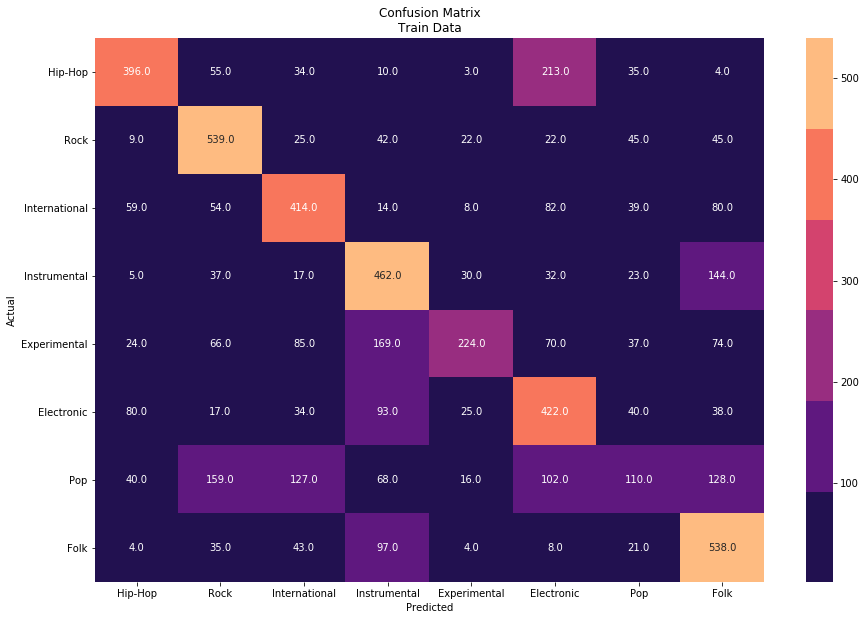

In [49]:
plot_confusion_matrix(y_train,lb.inverse_transform(dropreg_model.predict(X_train)),'Train')

Accuracy: 0.454000
Precision: 0.448374
Recall: 0.454000
F1 score: 0.436243


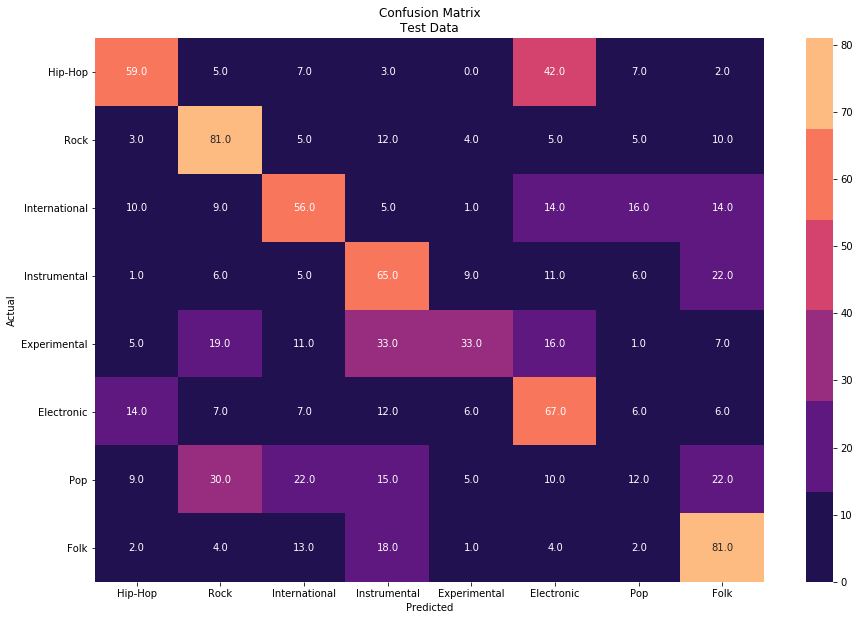

In [50]:
plot_confusion_matrix(y_test,lb.inverse_transform(dropreg_model.predict(X_test)),'Test')

# Drop - Reg 3

In [51]:
dropreg_model3 = models.Sequential()
dropreg_model3.add(layers.Dropout(0.3,input_shape=(X_train.shape[1],)))
dropreg_model3.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
dropreg_model3.add(layers.Dropout(0.4))
dropreg_model3.add(layers.Dense(128, activation='relu'))
dropreg_model3.add(layers.Dense(64, activation='relu'))
dropreg_model3.add(layers.Dropout(0.4))
dropreg_model3.add(layers.Dense(8, activation='sigmoid'))

dropreg_model3.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [52]:
history_dropreg3 = dropreg_model3.fit(X_train,
                    y_train_lb,
                    epochs=75,validation_data=(X_val,y_val_lb),shuffle=False)

Train on 5997 samples, validate on 1000 samples
Epoch 1/75
5997/5997 [==============================] - 2s 328us/step - loss: 2.0315 - acc: 0.2951 - val_loss: 1.8229 - val_acc: 0.4000
Epoch 2/75
5997/5997 [==============================] - 1s 124us/step - loss: 1.8452 - acc: 0.3497 - val_loss: 1.7283 - val_acc: 0.3990
Epoch 3/75
5997/5997 [==============================] - 1s 122us/step - loss: 1.7962 - acc: 0.3658 - val_loss: 1.7002 - val_acc: 0.4060
Epoch 4/75
5997/5997 [==============================] - 1s 126us/step - loss: 1.7766 - acc: 0.3633 - val_loss: 1.6776 - val_acc: 0.3900
Epoch 5/75
5997/5997 [==============================] - 1s 123us/step - loss: 1.7618 - acc: 0.3802 - val_loss: 1.6626 - val_acc: 0.4260
Epoch 6/75
5997/5997 [==============================] - 1s 120us/step - loss: 1.7512 - acc: 0.3815 - val_loss: 1.6543 - val_acc: 0.4060
Epoch 7/75
5997/5997 [==============================] - 1s 122us/step - loss: 1.7429 - acc: 0.3829 - val_loss: 1.6514 - val_acc: 0.4080


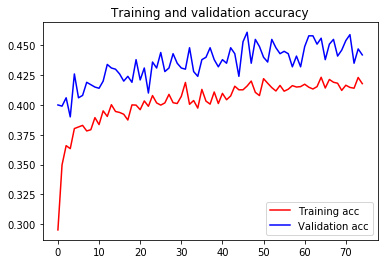

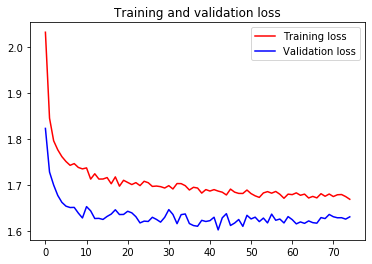

5997/5997 [==============================] - 0s 48us/step
----------
Training Loss: 1.51 
Training Accuracy: 0.488
1000/1000 [==============================] - 0s 68us/step
----------
Testing Loss: 1.66 
Testing Accuracy: 0.414


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_dropreg3.history['acc']
val_acc = history_dropreg3.history['val_acc']
loss = history_dropreg3.history['loss']
val_loss = history_dropreg3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,  'b', c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


dropreg_model3.save('../savedmodels/neuralnetworks/dropreg_model3.h5')


drop_results_train = dropreg_model3.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {drop_results_train[0]:.3} \nTraining Accuracy: {drop_results_train[1]:.3}')

drop_results_test = dropreg_model3.evaluate(X_test, y_test_lb)
print('----------')
print(f'Testing Loss: {drop_results_test[0]:.3} \nTesting Accuracy: {drop_results_test[1]:.3}')

Accuracy: 0.487911
Precision: 0.501476
Recall: 0.487866
F1 score: 0.466195


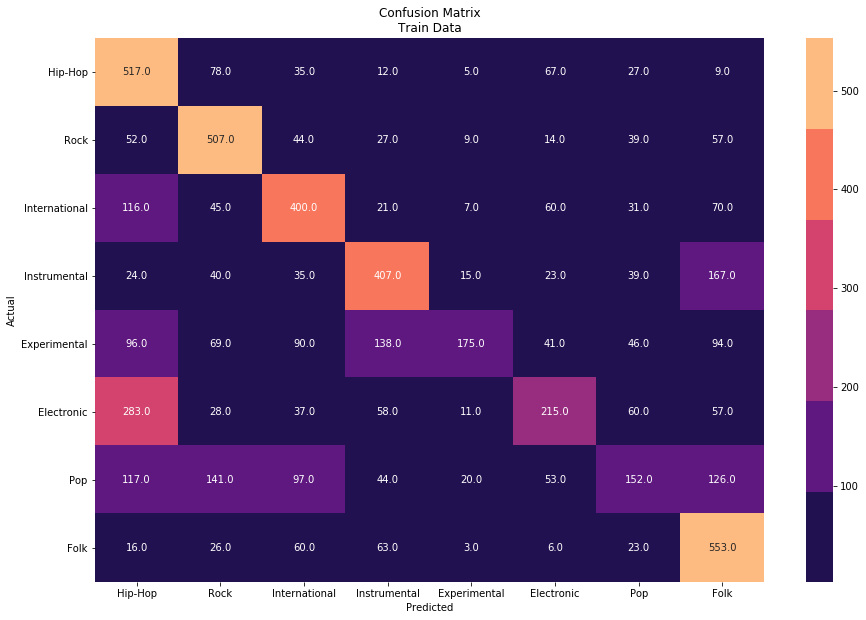

In [54]:
plot_confusion_matrix(y_train,lb.inverse_transform(dropreg_model3.predict(X_train)),'Train')

Accuracy: 0.414000
Precision: 0.409566
Recall: 0.414000
F1 score: 0.389539


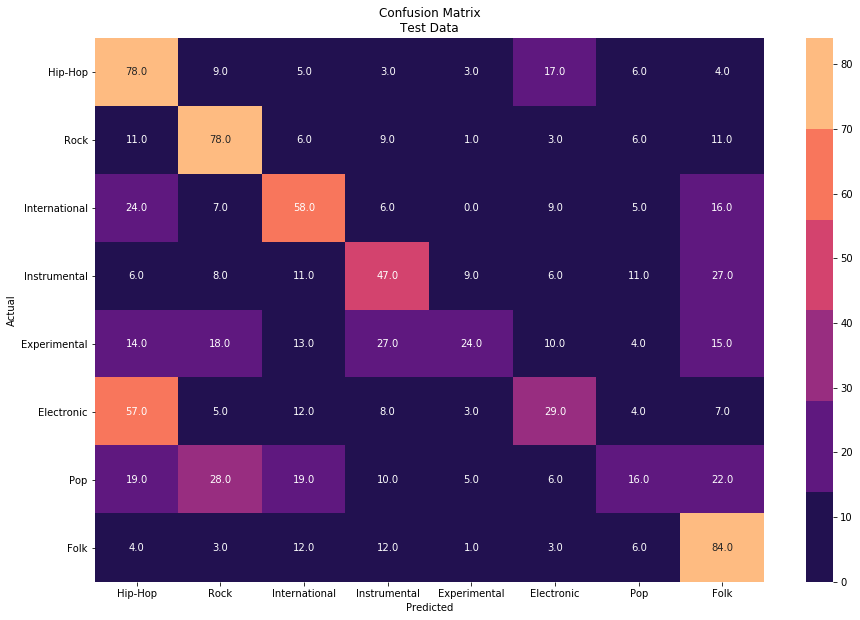

In [55]:
plot_confusion_matrix(y_test,lb.inverse_transform(dropreg_model3.predict(X_test)),'Test')

# Drop reg 2

In [56]:
dropreg_model2 = models.Sequential(name='dropreg2')

dropreg_model2.add(layers.Dense(256, activation='relu', kernel_initializer='lecun_normal',kernel_regularizer=regularizers.l1(0.005),input_shape=(X_train.shape[1],)))
dropreg_model2.add(layers.Dropout(0.4))
dropreg_model2.add(layers.Dense(128, activation='relu'))
dropreg_model2.add(layers.Dense(64, activation='relu'))
dropreg_model2.add(layers.Dropout
                   (0.3))
dropreg_model2.add(layers.Dense(8, activation='softmax'))

dropreg_model2.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_dropreg2 = dropreg_model2.fit(X_train,
                    y_train_lb,batch_size=175,
                    epochs=75,validation_data=(X_val,y_val_lb),shuffle=False)

Train on 5997 samples, validate on 1000 samples
Epoch 1/75
5997/5997 [==============================] - 2s 295us/step - loss: 6.8606 - acc: 0.2706 - val_loss: 5.7120 - val_acc: 0.4030
Epoch 2/75
5997/5997 [==============================] - 0s 41us/step - loss: 5.0290 - acc: 0.3613 - val_loss: 4.2096 - val_acc: 0.3970
Epoch 3/75
5997/5997 [==============================] - 0s 40us/step - loss: 3.7065 - acc: 0.3902 - val_loss: 3.1694 - val_acc: 0.4130
Epoch 4/75
5997/5997 [==============================] - 0s 38us/step - loss: 2.8441 - acc: 0.3967 - val_loss: 2.4942 - val_acc: 0.4220
Epoch 5/75
5997/5997 [==============================] - 0s 40us/step - loss: 2.2997 - acc: 0.4229 - val_loss: 2.1120 - val_acc: 0.4260
Epoch 6/75
5997/5997 [==============================] - 0s 39us/step - loss: 2.0266 - acc: 0.4142 - val_loss: 1.9164 - val_acc: 0.4150
Epoch 7/75
5997/5997 [==============================] - 0s 39us/step - loss: 1.8858 - acc: 0.4114 - val_loss: 1.8593 - val_acc: 0.4160
Epoch 

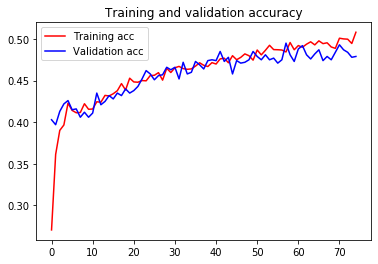

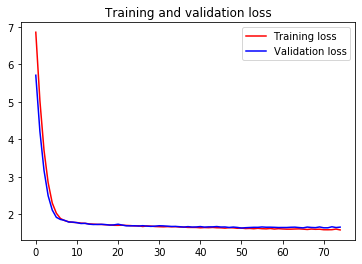

5997/5997 [==============================] - 0s 45us/step
----------
Training Loss: 1.46 
Training Accuracy: 0.546
1000/1000 [==============================] - 0s 44us/step
----------
Training Loss: 1.66 
Training Accuracy: 0.47


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_dropreg2.history['acc']
val_acc = history_dropreg2.history['val_acc']
loss = history_dropreg2.history['loss']
val_loss = history_dropreg2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,  'b', c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


dropreg_model2.save('../savedmodels/neuralnetworks/dropreg_model2.h5')

drop_results_train = dropreg_model2.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {drop_results_train[0]:.3} \nTraining Accuracy: {drop_results_train[1]:.3}')

drop_results_test = dropreg_model2.evaluate(X_test, y_test_lb)
print('----------')
print(f'Training Loss: {drop_results_test[0]:.3} \nTraining Accuracy: {drop_results_test[1]:.3}')

Accuracy: 0.470000
Precision: 0.466668
Recall: 0.470000
F1 score: 0.455939


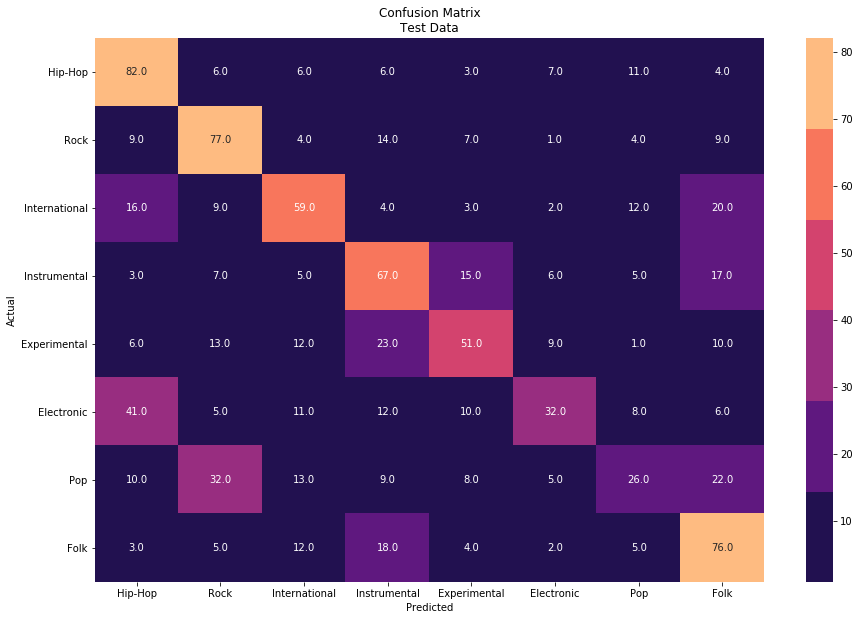

In [58]:
plot_confusion_matrix(y_test,lb.inverse_transform(dropreg_model2.predict(X_test)),'Test')

Accuracy: 0.546106
Precision: 0.546154
Recall: 0.546077
F1 score: 0.530127


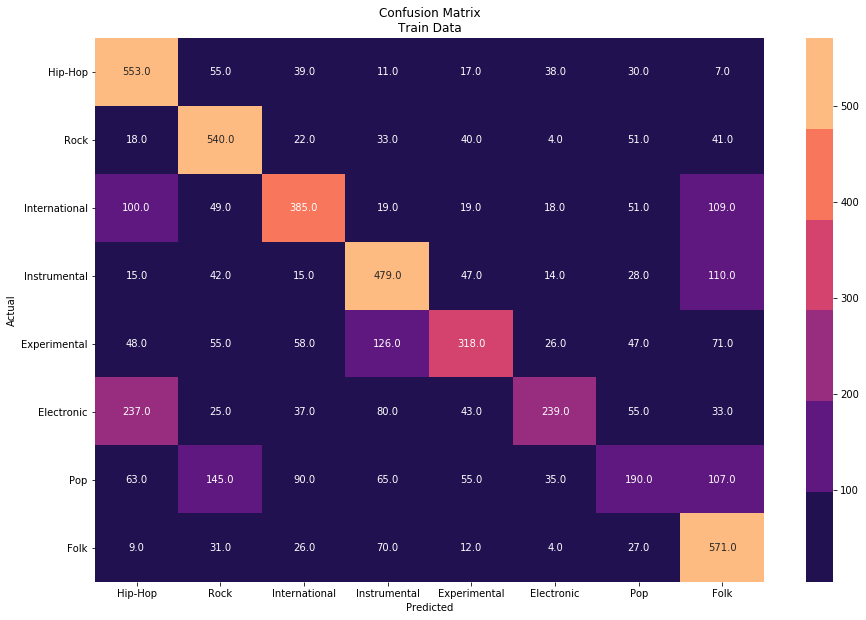

In [59]:
plot_confusion_matrix(y_train,lb.inverse_transform(dropreg_model2.predict(X_train)),'Train')

# Lecun Model

In [60]:
lecun_model = models.Sequential(name='lecun')
lecun_model.add(layers.Dense(256, kernel_initializer='lecun_normal',kernel_regularizer=regularizers.l1(0.005), activation='relu', input_shape=(X_train.shape[1],)))
lecun_model.add(layers.Dropout(0.4))
# Add another hidden layer
lecun_model.add(layers.Dense(128,activation='relu'))
lecun_model.add(layers.Dense(64, kernel_initializer='lecun_normal',kernel_regularizer=regularizers.l1(0.005),activation='relu'))
lecun_model.add(layers.Dropout(0.4))
# Add an output layer
lecun_model.add(layers.Dense(8, activation='softmax'))

# Compile the model
lecun_model.compile(optimizer='nadam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

# Train the model
lecun_r = lecun_model.fit(X_train,  y_train_lb, epochs=60,batch_size=175,validation_data=(X_val, y_val_lb))




Train on 5997 samples, validate on 1000 samples
Epoch 1/60
5997/5997 [==============================] - 1s 235us/step - loss: 9.0935 - acc: 0.2580 - val_loss: 7.2099 - val_acc: 0.3800
Epoch 2/60
5997/5997 [==============================] - 0s 23us/step - loss: 5.9707 - acc: 0.3490 - val_loss: 4.7641 - val_acc: 0.3800
Epoch 3/60
5997/5997 [==============================] - 0s 20us/step - loss: 4.0253 - acc: 0.3657 - val_loss: 3.3283 - val_acc: 0.3900
Epoch 4/60
5997/5997 [==============================] - 0s 48us/step - loss: 2.9546 - acc: 0.3735 - val_loss: 2.6207 - val_acc: 0.3720
Epoch 5/60
5997/5997 [==============================] - 0s 31us/step - loss: 2.4035 - acc: 0.3730 - val_loss: 2.2611 - val_acc: 0.3500
Epoch 6/60
5997/5997 [==============================] - 0s 42us/step - loss: 2.1407 - acc: 0.3650 - val_loss: 2.1193 - val_acc: 0.3560
Epoch 7/60
5997/5997 [==============================] - 0s 38us/step - loss: 2.0391 - acc: 0.3612 - val_loss: 2.0029 - val_acc: 0.3770
Epoch 

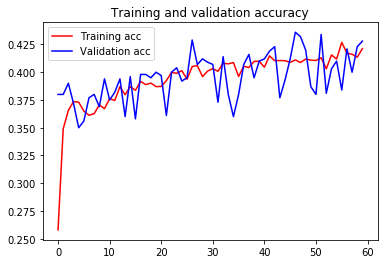

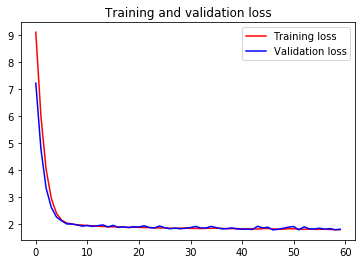

5997/5997 [==============================] - 0s 48us/step
----------
Training Loss: 1.77 
Training Accuracy: 0.433
1000/1000 [==============================] - 0s 36us/step
----------
Training Loss: 1.81 
Training Accuracy: 0.4


In [61]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = lecun_r.history['acc']
val_acc = lecun_r.history['val_acc']
loss = lecun_r.history['loss']
val_loss = lecun_r.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,  'b', c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


lecun_model.save('../savedmodels/neuralnetworks/lecunmodel.h5')


drop_results_train = lecun_model.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {drop_results_train[0]:.3} \nTraining Accuracy: {drop_results_train[1]:.3}')

drop_results_test = lecun_model.evaluate(X_test, y_test_lb)
print('----------')
print(f'Training Loss: {drop_results_test[0]:.3} \nTraining Accuracy: {drop_results_test[1]:.3}')

Accuracy: 0.432550
Precision: 0.416702
Recall: 0.432536
F1 score: 0.413777


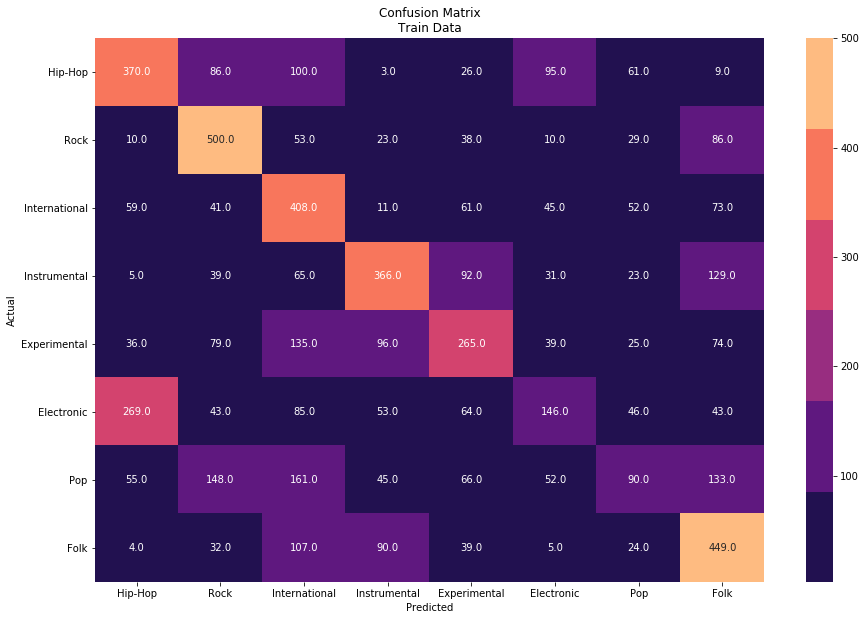

In [99]:
plot_confusion_matrix(y_train,lb.inverse_transform(lecun_model.predict(X_train)),'Train')

Accuracy: 0.400000
Precision: 0.383242
Recall: 0.400000
F1 score: 0.381294


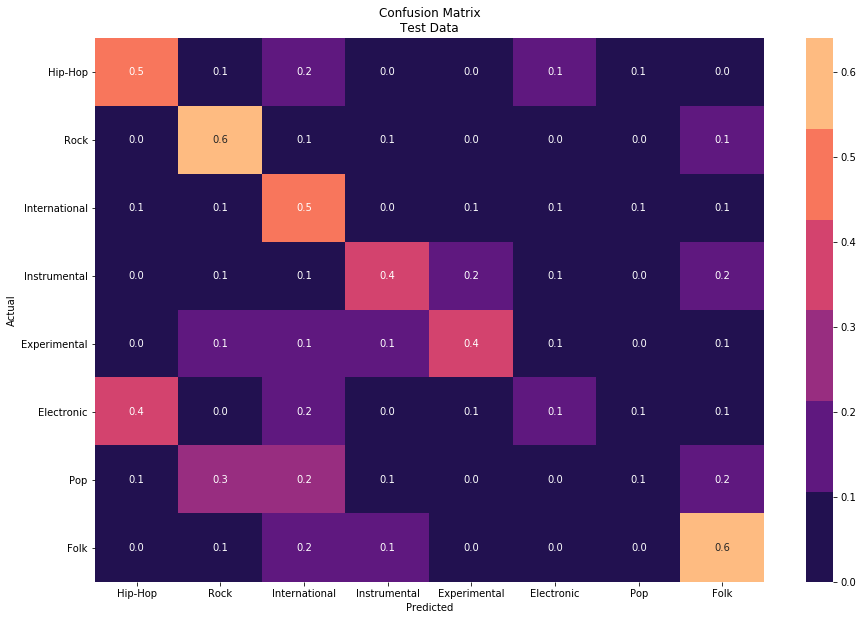

In [101]:
plot_confusion_matrix(y_test,lb.inverse_transform(lecun_model.predict(X_test)),'Test',normalize='true')

Accuracy: 0.400000
Precision: 0.383242
Recall: 0.400000
F1 score: 0.381294


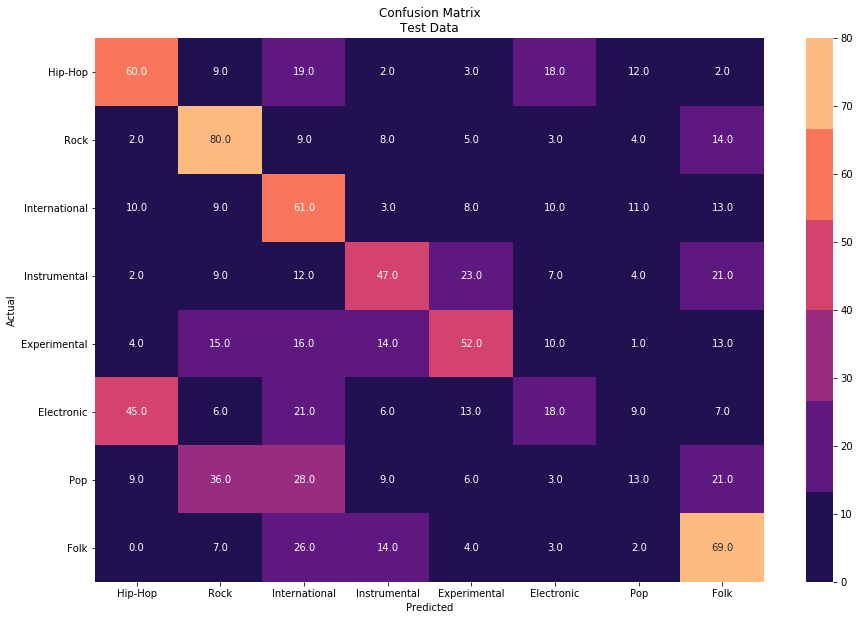

In [100]:
plot_confusion_matrix(y_test,lb.inverse_transform(lecun_model.predict(X_test)),'Test')

# Using He_normal

In [70]:
from keras import regularizers

In [89]:
he_model = models.Sequential()
# Add the first hidden layer
he_model.add(layers.Dense(256, kernel_initializer='he_normal',kernel_regularizer=regularizers.l1(0.005), activation='relu', input_shape=(X_train.shape[1],)))
he_model.add(layers.Dropout(0.4))
# Add another hidden layer
he_model.add(layers.Dense(128,activation='relu'))
he_model.add(layers.Dense(64, kernel_initializer='he_normal',kernel_regularizer=regularizers.l1(0.005),activation='relu'))
he_model.add(layers.Dropout(0.4))
# Add an output layer
he_model.add(layers.Dense(8, activation='softmax'))

# Compile the model
he_model.compile(optimizer='nadam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

# Train the model
he_r = he_model.fit(X_train,  y_train_lb, epochs=100,batch_size=150,validation_data=(X_val, y_val_lb))

Train on 5997 samples, validate on 1000 samples
Epoch 1/100
5997/5997 [==============================] - 2s 369us/step - loss: 12.8695 - acc: 0.2376 - val_loss: 10.8385 - val_acc: 0.3770
Epoch 2/100
5997/5997 [==============================] - 0s 53us/step - loss: 9.3390 - acc: 0.3380 - val_loss: 7.7590 - val_acc: 0.3830
Epoch 3/100
5997/5997 [==============================] - 0s 43us/step - loss: 6.6727 - acc: 0.3630 - val_loss: 5.5432 - val_acc: 0.3880
Epoch 4/100
5997/5997 [==============================] - 0s 43us/step - loss: 4.8207 - acc: 0.3789 - val_loss: 4.0765 - val_acc: 0.3940
Epoch 5/100
5997/5997 [==============================] - 0s 51us/step - loss: 3.6311 - acc: 0.3759 - val_loss: 3.1582 - val_acc: 0.3880
Epoch 6/100
5997/5997 [==============================] - 0s 42us/step - loss: 2.8848 - acc: 0.3674 - val_loss: 2.5752 - val_acc: 0.3940
Epoch 7/100
5997/5997 [==============================] - 0s 40us/step - loss: 2.4263 - acc: 0.3715 - val_loss: 2.2341 - val_acc: 0.41

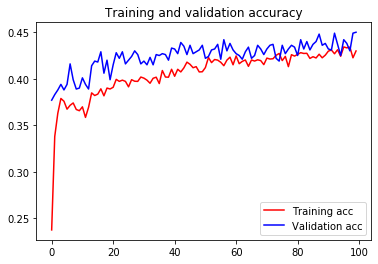

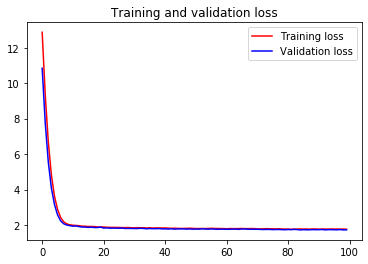

5997/5997 [==============================] - 0s 53us/step
----------
Training Loss: 1.67 
Training Accuracy: 0.473
1000/1000 [==============================] - 0s 48us/step
----------
Training Loss: 1.73 
Training Accuracy: 0.452


In [90]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = he_r.history['acc']
val_acc = he_r.history['val_acc']
loss = he_r.history['loss']
val_loss = he_r.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc,  'b', c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  'b', c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

he_model.save('../savedmodels/neuralnetworks/hemodel.h5')


drop_results_train = he_model.evaluate(X_train, y_train_lb)
print('----------')
print(f'Training Loss: {drop_results_train[0]:.3} \nTraining Accuracy: {drop_results_train[1]:.3}')

drop_results_test = he_model.evaluate(X_test, y_test_lb)
print('----------')
print(f'Training Loss: {drop_results_test[0]:.3} \nTraining Accuracy: {drop_results_test[1]:.3}')

Accuracy: 0.472736
Precision: 0.451910
Recall: 0.472726
F1 score: 0.449037


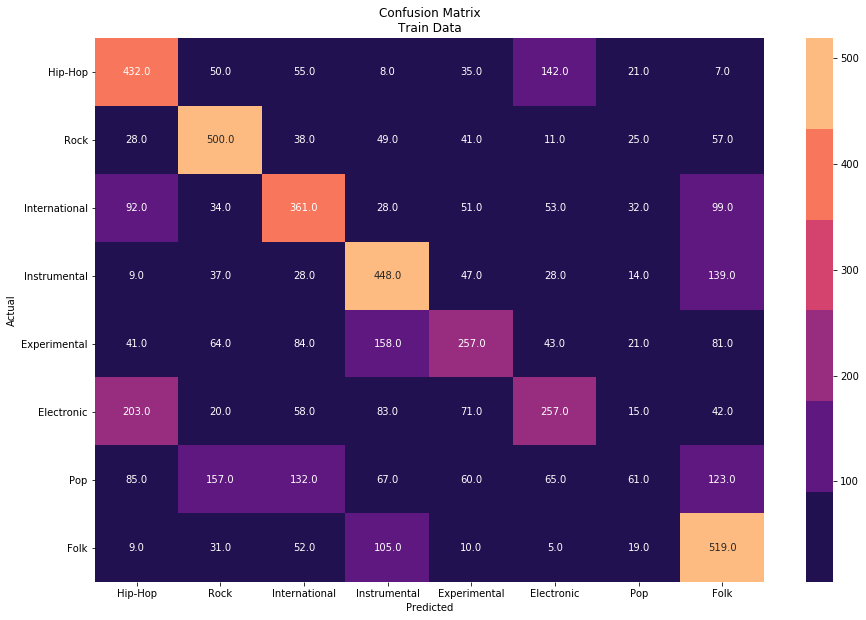

In [102]:
plot_confusion_matrix(y_train,lb.inverse_transform(he_model.predict(X_train)),'Train')

Accuracy: 0.452000
Precision: 0.443987
Recall: 0.452000
F1 score: 0.434944


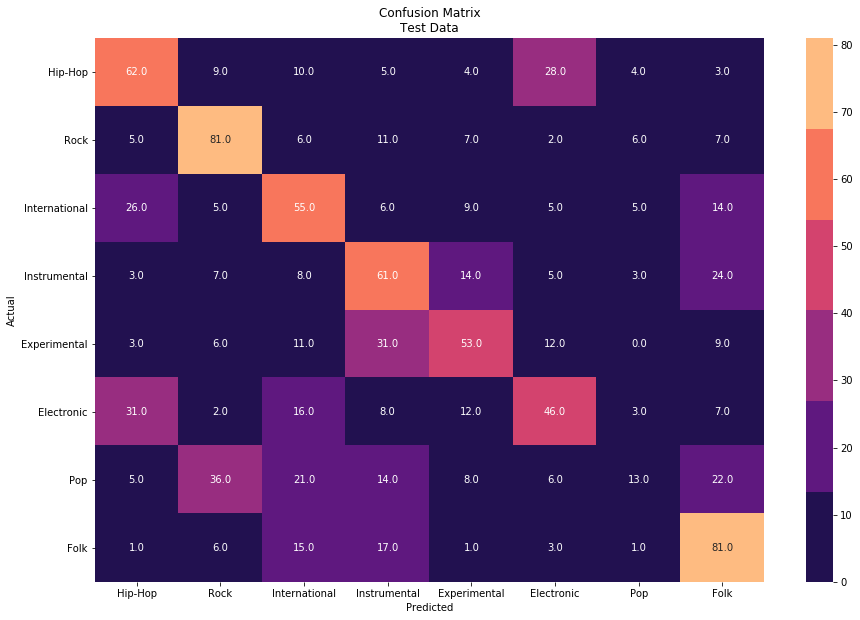

In [103]:
plot_confusion_matrix(y_test,lb.inverse_transform(he_model.predict(X_test)),'Test')

Accuracy: 0.452000
Precision: 0.443987
Recall: 0.452000
F1 score: 0.434944


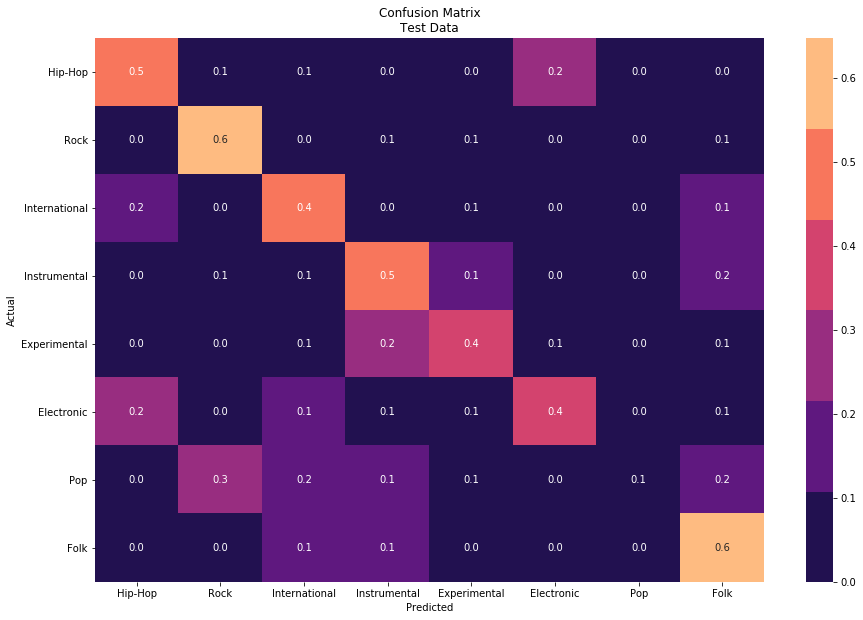

In [104]:
plot_confusion_matrix(y_test,lb.inverse_transform(he_model.predict(X_test)),'Test',normalize='true')

In [93]:
he_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               7936      
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_67 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 8)                 520       
Total params: 49,608
Trainable params: 49,608
Non-trainable params: 0
_________________________________________________________________
